In [62]:
# Regression Tree & Random Forest

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [ ]:
## Regression Tree

In [3]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeRegressor(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

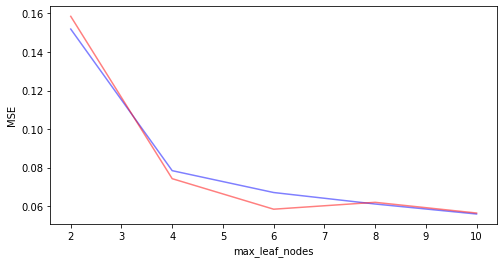

In [4]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [5]:
# Fitting Tree to the Training set
dt = DecisionTreeRegressor(max_leaf_nodes = 6).fit(X_train, y_train)

In [6]:
# Predicting the Test set results
y_pred = dt.predict(X_test)

In [7]:
# Coefficient of determination R^2
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.8199919725528823, 0.7511320374975577)

In [8]:
# Mean squared error
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.06705675924751356, 0.05839421251422263)

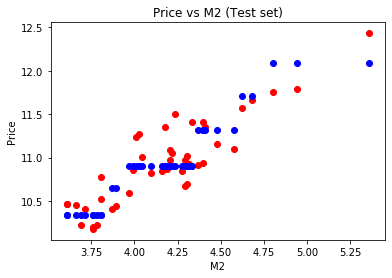

In [9]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], dt.predict(X_test), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [ ]:
## Random Forest

In [11]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

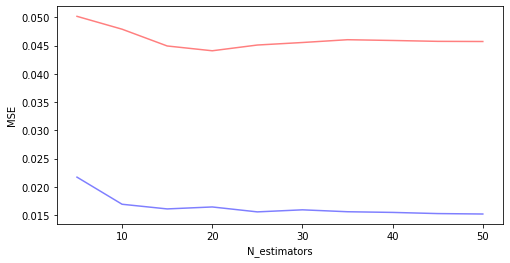

In [12]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestRegressor    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [13]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=20, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

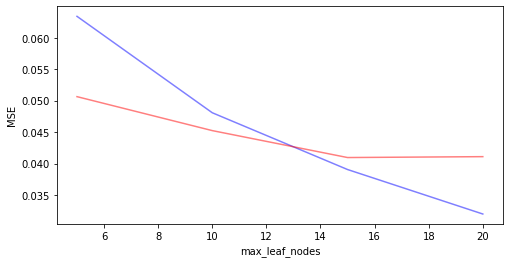

In [15]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [5, 10, 15, 20])

In [16]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, max_leaf_nodes = 15, random_state = 10).fit(X_train, y_train)

In [17]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

In [18]:
# Coefficient of determination R^2
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8951578560933721, 0.825427314874233)

In [19]:
# Mean squared error
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.03905589379898788, 0.040961618248923734)

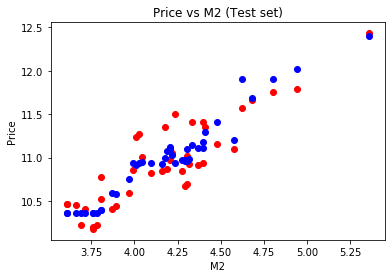

In [22]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], rf.predict(X_test), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()